# Lab 3 - Numpy Arrays

In this lab, you will learn to work with Numpy Arrays. 

In machine learning, we often store data in multidimensional arrays. 

Consider the case of a table in the Relational Model. The tuples, or records, can be thought of as rows in a matrix (a 2-dimensional array). The columns contain the attributes, or featuers.

For example, from our music dataset:


| SONGID             |     TITLE    | YEAR | TERMS      | ARTIST     | DURATION  | LOUDNESS | KEY | TEMPO   |
|:--------------------|:------------|-----|:------------|:------------|-----------|----------|-----|---------|
| SOSGXII12A67020363 |    Vertigo   | 2004 | dance rock | U2         | 451.44771 | -4.833   | 11  | 130.013 |
| SOUTCRW12A8C13D937 |    Domino    | 1992 | hard rock  | KISS       | 240.45669 | -8.471   | 2   | 91.413  |
| SOAVAUP12AB0181301 | King Of Pain | 1983 | new wave   | The Police | 318.01424 | -5.03    | 7   | 86.693  |

In this case, each row in the matrix is a song and each column contains information about the song.

Sometimes, we need to represent our data or model using more than 2 dimensions.

## Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation (LDA) is a model used to represent bodies of text. It's a hierarchical, probabilitic, generative model that represents each document in a collection as a mixture of topics. Each topic is a mixture of words. 

What does this mean? Think of it this way. Imagine that we have a corpus of documents that cover a variety of topics, and we want to model how they were generated. Conceivably, we could start with a limited vocabulary - basically a dictionary of words. We could then determine how likely each word is to appear in a document on a particular topic. We could then use that vector of frequencies to generate a document on a topic by sampling words based on their probability of occuring.

For example, we might the following vocabulary:

[ banana , baseball , chicken , elephant , engineering , houston , owl , produce , rice , squirrel , tiger ]

For convenience, we refer to each word using its index in the array. 

Then, we might have the following topics:

[zoo, groceries, Rice University, produce, Houston, engineering, education]

Each word has a certain likelihood of appearing in a topic. The word likelihood of our vocabulary for the Zoo topic might be:

[ .1, .001, .3, .7, .003, .2, .05, .1, .07, .2, .8]

So, if a document is about the Zoo, the word elephant is pretty likely to appear.

Finally, we have documents. Documents are composed of topics:
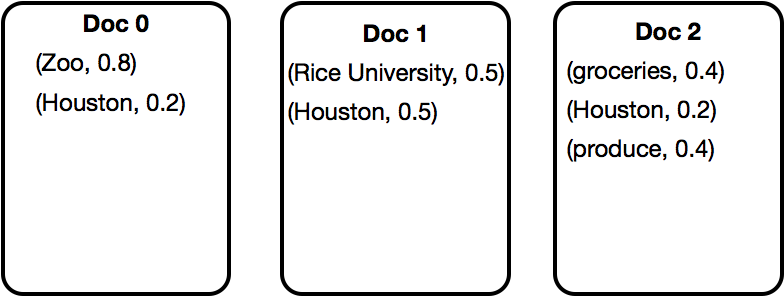



Once we know the topics for a document, we can populate it with words based on how likely each word is to appear:

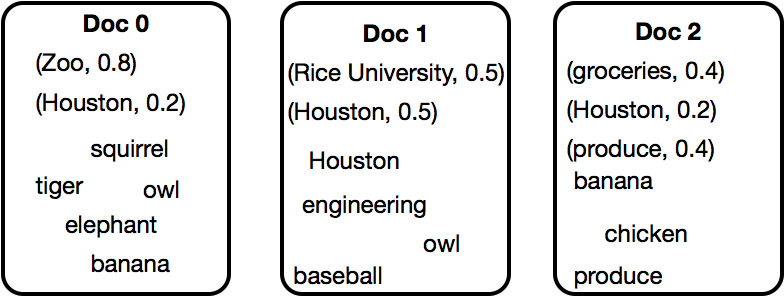


For more information see:  

* A relatively easy to understand blog post: [blog](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

* The seminal paper: Blei DM, Ng AY, Jordan MI. Latent dirichlet allocation. The Journal of Machine Learning Research. 2003;3:993-1022. [link to paper](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)


Consider the following version of the LDA generative process, that records the words in
each document as well as which topic produced which word. 

We end up with a 3 dimensional array. 
* Dimension **i** is the document index
* Dimension **j** is the topic index
* Dimension **k** is the word index

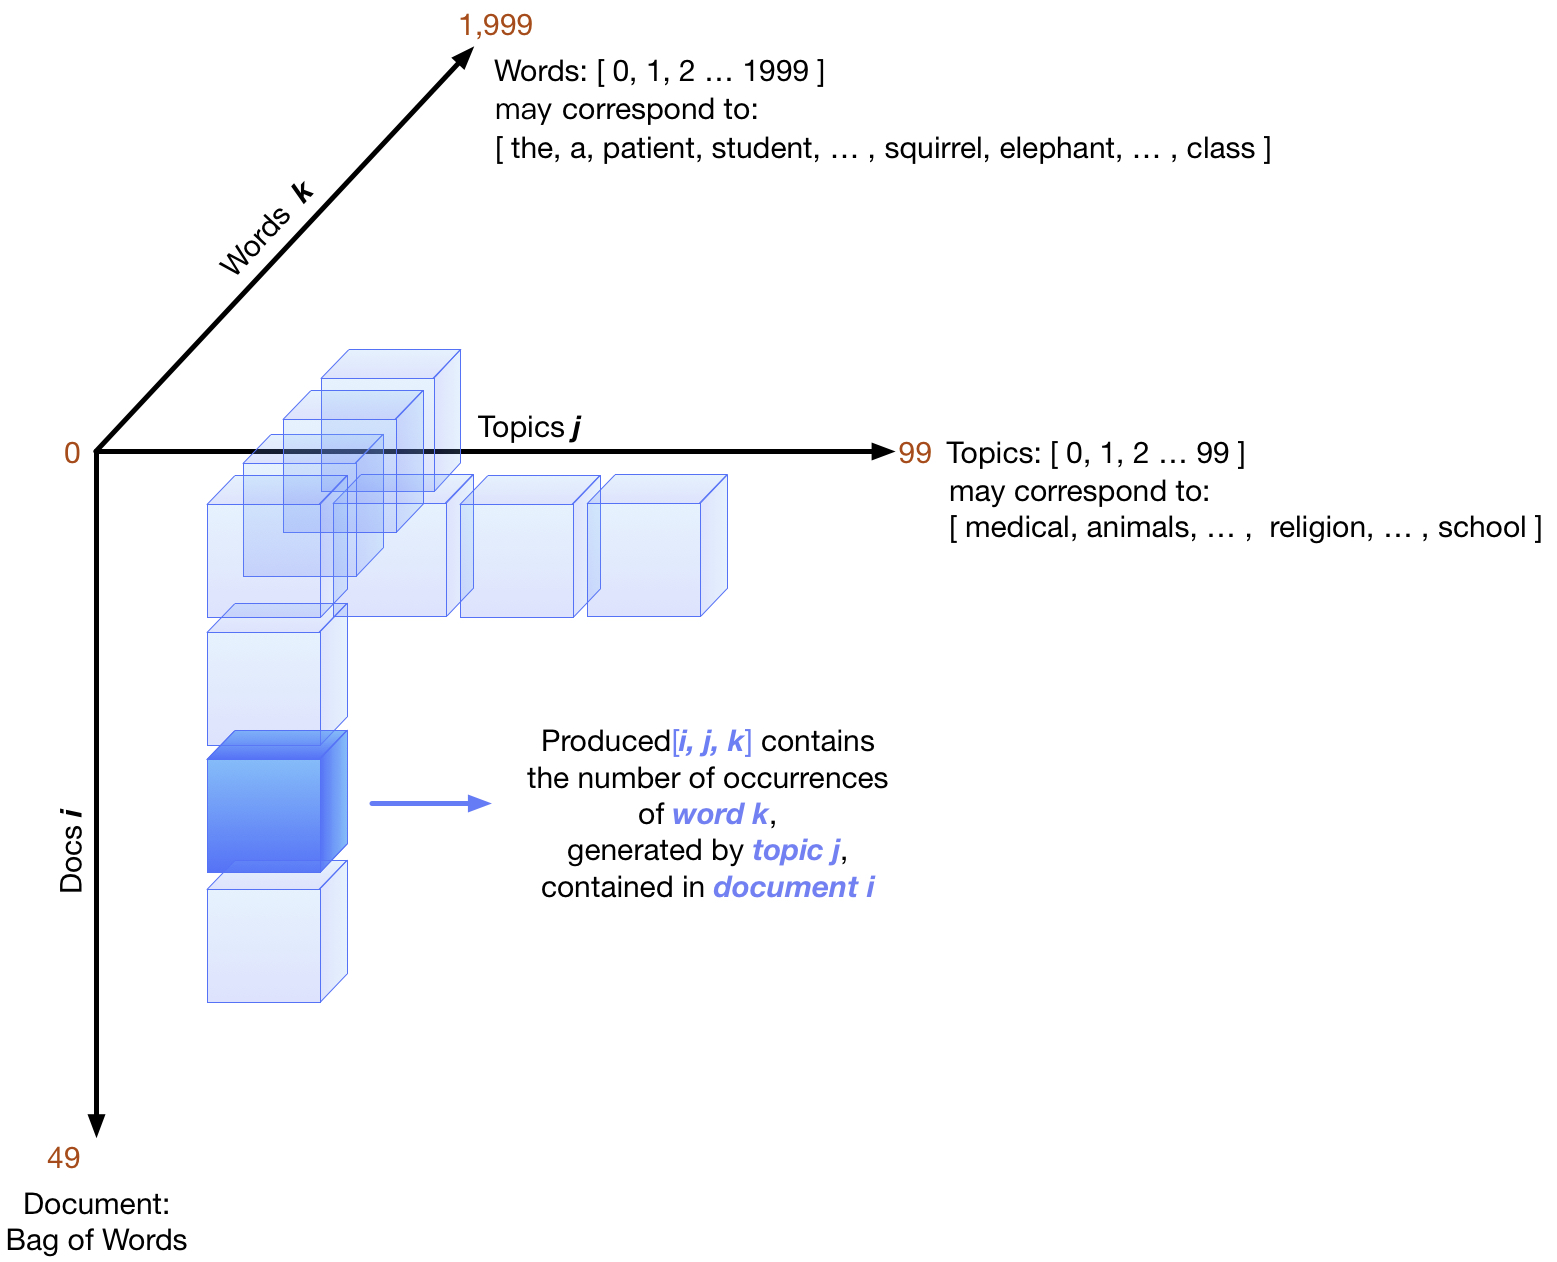

Run this code to create your own document corpus. Note that the generative process is stochastic, so your corpus will be different from everyone elses, and if you run the code again, you will get a different corpus.

In [ ]:
import numpy as np

# uncomment the next line to produce the same results every time
# np.random.seed(302)

# there are 2000 words 
alpha = np.full (2000, .1)
 
# there are 100 topics
beta = np.full (100, .1)
 
# this gets us the probabilty of each word happening in each of the 100 topics
wordsInTopic = np.random.dirichlet (alpha, 100)
 
# produced [doc, topic, word] gives us the number of times that the given word was
# produced by the given topic in the given doc
produced = np.zeros ((50, 100, 2000))
 
# generate each doc
for doc in range (0, 50):
        #
        # get the topic probabilities for this doc
        topicsInDoc = np.random.dirichlet (beta)
        #
        # assign each of the 2000 words in this doc to a topic
        wordsToTopic = np.random.multinomial (2000, topicsInDoc)
        #
        # and generate each of the 2000 words
        for topic in range (0, 100):
                produced[doc, topic] = np.random.multinomial (wordsToTopic[topic], wordsInTopic[topic])

As described in the comments,
```
  produced [doc, topic, word]
```  
gives the number of times that the given word was produced by the given topic in the given document. You need to complete the five tasks where we have not given an answer, and then show your answers in order to get checked off.

Think about the dimensions of the array that should contain your answer. The ndarray **shape** property might be helpful.

(1) Write a line of code that computes the number of words produced by topic 17 in
document 18.

In [ ]:
produced[18,17,:].sum ()

(2) Write a line of code that computes the number of words produced by topic 17 thru 45 in document 18.

(3) Write a line of code that computes the total number of words in the entire corpus.

(4) Write a line of code that computes the number of words in the entire corpus produced by topic 17.

(5) Write a line of code that computes the number of words in the entire corpus
produced by topic 17 or topic 23.

In [ ]:
produced[:,np.array([17,23]),:].sum()

(6) Write a line of code that computes the number of words in the entire corpus
produced by even numbered topics.

In [ ]:
produced[:,np.arange(0,100,2),:].sum()

(7) Write a line of code that returns the indexes of the 2000 words, of the ones generated by topic 15

(8) Write a line of code that, for each word in the corpus, gives the index of the topic responsible for the most instances of that word.

(9) Write a line of code that for each topic, computes the max number of occurrences (summed over all documents) of any word that it was responsible for.

In [ ]:
produced[:,np.arange(0,100,1),produced.sum(0).argmax(1)].sum(0)

Copyright ©  2019 Rice University

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.